In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
import pprint

pp = pprint.PrettyPrinter(indent=4)

In [2]:
data = pd.read_csv("topCharts_continuous.csv", index_col= 0)

In [3]:
cluster_df = pd.DataFrame(columns = data.columns)

for a in data["Artist"].unique():
    df_a = data[data["Artist"] == a]
    for s in df_a["Title"].unique():
        df_as = df_a[df_a["Title"] == s]
        cluster_df.loc[len(cluster_df)] = df_as.iloc[0,:]


In [4]:
mms = MinMaxScaler()
cluster_values = cluster_df.iloc[:,2:]
mms.fit(cluster_values)
data_transformed = mms.transform(cluster_values)

In [5]:
inertias = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i).fit(data_transformed)
    inertias.append(kmeans.inertia_)
print(inertias)

[729.4363942996962, 514.1937394426532, 414.0591279035871, 362.34521745517736, 326.06469706433774, 296.52189293188326, 277.43594466223055, 260.7997543234725, 247.04610379376814, 231.57537069411566, 223.10436665570816, 214.19042533867687, 205.24522497947135, 200.10882728979138, 192.97557358455816, 187.32694826572407, 182.87256200178518, 177.28747157153416, 172.74376003388403]


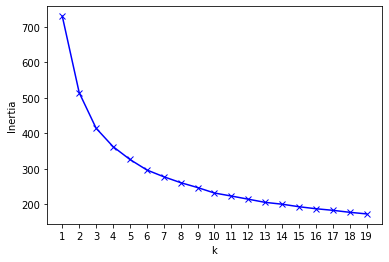

In [6]:
plt.plot(range(1,len(inertias)+1), inertias, "bx-")
plt.xlabel('k')
plt.ylabel("Inertia")
plt.xticks(range(1,len(inertias)+1))
plt.show()
#k=9

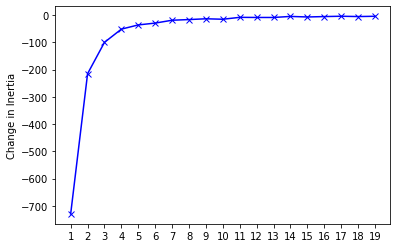

In [7]:
diffs = np.array(inertias[1:]) - np.array(inertias[:len(inertias)-1])
plt.plot(range(1,len(inertias)+1), [-inertias[0]] + list(diffs),"bx-")
plt.ylabel("Change in Inertia")
plt.xticks(range(1,len(inertias)+1))

plt.show()

In [8]:
kmeans_opt = KMeans(n_clusters = 10).fit(data_transformed)

In [9]:
labels = kmeans_opt.labels_
cluster_df["Label"] = labels

In [10]:
print(cluster_df[cluster_df["Label"] == 0].head())
print()
print(cluster_df[cluster_df["Label"] == 9].head())

         Artist                       Title    Tempo  Valence  Danceability  \
0   Post Malone                    rockstar  159.801    0.129         0.585   
5   Post Malone               White Iverson  130.098    0.309         0.675   
9   Post Malone                    Paranoid  159.914    0.253         0.625   
19  Post Malone  rockstar (feat. 21 Savage)  159.801    0.129         0.585   
22  Post Malone              Blame It On Me  121.873    0.274         0.652   

    Energy  Acousticness  Instrumentalness  Label  
0    0.520         0.124          0.000070      0  
5    0.562         0.233          0.000000      0  
9    0.536         0.038          0.000023      0  
19   0.520         0.124          0.000070      0  
22   0.591         0.145          0.000006      0  

          Artist                  Title    Tempo  Valence  Danceability  \
24   Post Malone  Jonestown (Interlude)   77.592    0.288         0.380   
128       Khalid                   9.13  131.720    0.590     

In [11]:
pm = cluster_df[cluster_df["Artist"] == "Post Malone"].loc[:,["Title","Label"]]
pm.sort_values(by = "Label", inplace = True)
print(pm)

                                                Title  Label
0                                            rockstar      0
5                                       White Iverson      0
22                                     Blame It On Me      0
19                         rockstar (feat. 21 Savage)      0
9                                            Paranoid      0
25      Sunflower - Spider-Man: Into the Spider-Verse      1
7                        Psycho (feat. Ty Dolla $ign)      1
16                                       Takin' Shots      1
15                    Ball For Me (feat. Nicki Minaj)      1
37                                           Allergic      2
31                             Enemies (feat. DaBaby)      2
29                                            Circles      2
21                                        92 Explorer      2
32                               Hollywood's Bleeding      3
11                    Spoil My Night (feat. Swae Lee)      3
10                      

In [12]:
groups ={}
counters = {}
for i in range(10):
    groups[i] = cluster_df[cluster_df["Label"] == i]
    counters[i] = Counter(groups[i]["Artist"])

In [13]:
def getClusterSongs(cluster_num, groups = groups, counters = counters, artists = [], n_artists = 3):
    cnt = counters[cluster_num]
    grp = groups[cluster_num]
    artsong = {}
    if artists:
        assert(set(artists).issubset(set(cnt.keys())))
    else:
        n_artists = min(n_artists, len(cnt.keys()))
        artists = [a[0] for a in cnt.most_common(n_artists)]
    for artist in artists:
        artsong[artist] = list(grp[grp["Artist"] == artist]["Title"])
    return artsong   

In [19]:
pp.pprint(getClusterSongs(3))

{   'Drake': [   'Don’t Matter To Me',
                 'Summer Games',
                 '14-Mar',
                 'Final Fantasy',
                 'Don’t Matter To Me (with Michael Jackson)',
                 'Successful (feat. Trey Songz & Lil Wayne)',
                 'Days in The East',
                 'My Side',
                 'Can I',
                 'Heat Of The Moment'],
    'Mac Miller': [   'Self Care',
                      'Hurt Feelings',
                      'Conversation Pt. 1',
                      'Jet Fuel',
                      'Weekend (feat. Miguel)',
                      'Cinderella (feat. Ty Dolla $ign)',
                      'I Can See',
                      'Hand Me Downs',
                      "That's On Me"],
    'XXXTENTACION': [   'Jocelyn Flores',
                        'Hope',
                        'Save Me',
                        'Slipknot',
                        'King',
                        'The Explanation',
                     

In [17]:
pp.pprint(getClusterSongs(6))

{   'Billie Eilish': [   'lovely (with Khalid)',
                         'ocean eyes',
                         "when the party's over",
                         'bitches broken hearts',
                         'come out and play',
                         'lovely',
                         'WHEN I WAS OLDER - Music Inspired By The Film ROMA',
                         'xanny',
                         'listen before i go',
                         'i love you',
                         'goodbye',
                         'everything i wanted'],
    'Lana Del Rey': [   'Mariners Apartment Complex',
                        'Venice Bitch',
                        'hope is a dangerous thing for a woman like me to have '
                        '- but I have it',
                        'Fuck it I love you',
                        'The greatest',
                        'Norman fucking Rockwell',
                        'Cinnamon Girl',
                        'Love song',
              